# TikTok - Machine Learning Models

Let's build a machine learning model that can be used to determine whether a video contains a claim (Claim videos refer to those videos which violated the TikTok's terms) or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

In [3]:
# Import packages for data manipulation
import numpy as np
import pandas as pd

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import package for text processing
from sklearn.feature_extraction.text import CountVectorizer

# Import packages for data preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Import packages for data modeling
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

In [5]:
# Load dataset into dataframe
data = pd.read_csv("C:\\Users\\mukhe\\Desktop\\Data_Analytics\\Projects\\Datasets\\tiktok_dataset.csv")

In [6]:
# Display first few rows
data.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


In [7]:
# Get number of rows and columns
data.shape

(19382, 12)

In [9]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [10]:
# Generate basic descriptive stats
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [11]:
# Check for missing values
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [12]:
# Drop rows with missing values
data = data.dropna(axis=0).reset_index(drop=True)

In [72]:
data.isna().sum().sum()

0

In [13]:
# Check for duplicates
data.duplicated().sum()

0

**As we are using tree based models, they require minimum to no preprocessing and can handle multi collinearity and outliers. Therefore, we need not check for and handle the outliers and correlation of the independent variables.**

In [14]:
# Check class balance
data['claim_status'].value_counts(normalize=True)

claim      0.503458
opinion    0.496542
Name: claim_status, dtype: float64

### Feature engineering

In [15]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data['length_transcript'] = [len(text) for text in data['video_transcription_text']]
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,length_transcript
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


In [16]:
# Calculate the average text_length for claims and opinions
mean_text_len = data.groupby(['claim_status'])[['length_transcript']].mean()
mean_text_len

,length_transcript
claim_status,
claim,95.376978
opinion,82.722562


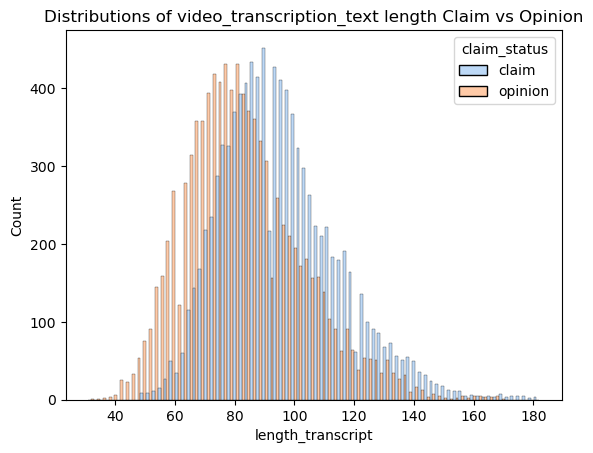

In [17]:
# Visualize the distribution of `text_length` for claims and opinions
sns.histplot(data=data, 
             x='length_transcript', 
             hue='claim_status',
             multiple='dodge',
             alpha=0.7,
             palette='pastel')
plt.title('Distributions of video_transcription_text length Claim vs Opinion')
plt.show()

**Feature selection and transformation**

In [18]:
# Create a copy of the X data
df = data.copy()

# Drop unnecessary columns
df = df.drop(columns=['#', 'video_id'], axis=1)

# Encode target variable
df['claim_status'] = df['claim_status'].map({'claim':1, 'opinion':0}) 

# Dummy encode remaining categorical values
df = pd.get_dummies(df, columns=['verified_status', 'author_ban_status'], drop_first=True, dtype=int)
df.head()

,claim_status,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,length_transcript,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,0,0,1
1,1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,0,0,0
2,1,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,0,0,0
3,1,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,0,0,0
4,1,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,0,0,0


In [19]:
# Initialize a CountVectorizer which converts the text into token counts
count_vec = CountVectorizer(ngram_range=(2,3),
                            max_features=10,
                            stop_words='english')
count_vec

CountVectorizer(max_features=10, ngram_range=(2, 3), stop_words='english')

In [20]:
# Extract numerical features
count_features = count_vec.fit_transform(data['video_transcription_text']).toarray()
count_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
# Convert the count_features array to DataFrame
count_vec_df = pd.DataFrame(count_features, columns=count_vec.get_feature_names_out())
count_vec_df.head()

,colleague learned,colleague read,discussion board,friend learned,friend read,internet forum,learned media,media claim,read media,social media
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [22]:
# Concatinate the 'count_vec_df' and 'df'. Also, drop 'video_transcription_text'
df2 = df.copy()

df2 = pd.concat([df.drop(columns=['video_transcription_text'], axis=1).reset_index(drop=True), count_vec_df], axis=1)
df2.head()

,claim_status,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,length_transcript,verified_status_verified,author_ban_status_banned,...,colleague learned,colleague read,discussion board,friend learned,friend read,internet forum,learned media,media claim,read media,social media
0,1,59,343296.0,19425.0,241.0,1.0,0.0,97,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,31,902185.0,97690.0,2858.0,833.0,329.0,137,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,25,437506.0,239954.0,34812.0,1234.0,584.0,131,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,19,56167.0,34987.0,4110.0,547.0,152.0,128,0,0,...,0,0,0,0,0,0,0,0,0,0


Assign target variable.

In [23]:
# Isolate target variable
y = df2['claim_status']

In [24]:
# Isolate features
X = df2.drop(columns=['claim_status'], axis=1)

# Display first few rows of features dataframe
X.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,length_transcript,verified_status_verified,author_ban_status_banned,author_ban_status_under review,colleague learned,colleague read,discussion board,friend learned,friend read,internet forum,learned media,media claim,read media,social media
0,59,343296.0,19425.0,241.0,1.0,0.0,97,0,0,1,0,0,0,0,0,0,0,0,0,0
1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,0,0,0,0,0,0,0,0,0,0,0,0,0
2,31,902185.0,97690.0,2858.0,833.0,329.0,137,0,0,0,0,0,0,0,0,0,0,0,0,0
3,25,437506.0,239954.0,34812.0,1234.0,584.0,131,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19,56167.0,34987.0,4110.0,547.0,152.0,128,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [26]:
# Split the training data into training and validation sets
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=0)

In [27]:
# Get shape of each training, validation, and testing set
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)
print('X_tr shape:', X_tr.shape)
print('y_tr shape:', y_tr.shape)
print('X_val shape:', X_val.shape)
print('y_val shape:', y_val.shape)

X_train shape: (15267, 20)
y_train shape: (15267,)
X_test shape: (3817, 20)
y_test shape: (3817,)
X_tr shape: (11450, 20)
y_tr shape: (11450,)
X_val shape: (3817, 20)
y_val shape: (3817,)


### Build models

#### Random Forest Model

In [37]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth':[4,10],
             'min_samples_leaf':[2, 5],
             'min_samples_split':[2, 5],
             'max_features':[0.5, 0.8],
             'n_estimators':[100, 300],
             'max_samples':[0.2, 0.8]}


# Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf,
                     cv_params,
                     scoring=scoring,
                     cv=5,
                     refit='recall',
                     n_jobs=-1)

In case of false negative i.e. video is not a claim but it actually is, users can have bad experience and lose trust in the app as the videos that are reported upon violaing terms are still on the app which in turn results in more churn rate. Therefore, we chose the evaluation metric as `recall` and refit the model with it.

In [38]:
%%time
rf_cv.fit(X_tr, y_tr)

CPU times: total: 6.59 s
Wall time: 4min 9s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [4, 10], 'max_features': [0.5, 0.8],
                         'max_samples': [0.2, 0.8], 'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 300]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [39]:
import pickle as pkl

path = 'C:\\Users\\mukhe\\Desktop\\Data_Analytics\\Projects\\Python_Pickle_files\\'

In [40]:
def write_pickle(path, model_object, save_name:str):
    '''
    funtion to store fit model as binary file using pickle library
    Arguments:
        path - filepath to store
        model_object - trained model
        save_name - string name
    '''
    with open(path + save_name + '.pkl', 'wb') as to_write:
        pkl.dump(model_object, to_write)

In [41]:
write_pickle(path, rf_cv, 'tiktok_rf_cv')

In [42]:
def read_pickle(path, saved_model_name:str):
    '''
    Funtion to read saved trained model
    Arguments:
        path - filepath
        saved_model_name - string name with which the model was saved
    '''
    with open(path + saved_model_name + '.pkl', 'rb') as to_read:
        model = pkl.load(to_read)
    return model

In [43]:
rf_cv = read_pickle(path, 'tiktok_rf_cv')

In [44]:
# Examine best recall score
rf_cv.best_score_

0.994448359352414

In [45]:
# Create a helper function that gets all the results and converts them into dataframe
def make_results(model_name:str, model_object):
    '''
    Funtion to create dataframe of results
    Arguments:
        model_name: string name of the model
        model_object: trained model object
    '''
    cv_results = pd.DataFrame(model_object.cv_results_)
    optimum_values = cv_results.iloc[cv_results['mean_test_f1'].idxmax(),:]
    
    accuracy = optimum_values.mean_test_accuracy
    precision = optimum_values.mean_test_precision
    recall = optimum_values.mean_test_recall
    f1 = optimum_values.mean_test_f1
    
    table = pd.DataFrame({'model_name':[model_name],
                          'F1':[f1],
                          'Precision':[precision],
                          'Recall':[recall],
                          'Accuracy':[accuracy]})
    return table

In [46]:
# Get all the results from the CV
rf_results = make_results('RandomForest_CV', rf_cv)
rf_results

,model_name,F1,Precision,Recall,Accuracy
0,RandomForest_CV,0.997216,1.0,0.994448,0.997205


In [47]:
# Examine best parameters
rf_cv.best_params_

{'max_depth': 10,
 'max_features': 0.8,
 'max_samples': 0.8,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

The model performed to almost perfection with Precision 1 i.e. no False positives and Recall 0.99.

#### XGBoost model

In [50]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
xgb_params = {'max_depth':[4, 10, None],
              'min_child_weight':[1, 3, 5],
              'learning_rate':[0.1, 0.2, 0.3],
              'n_estimators':[75, 150, 300]}

# Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb,
                      xgb_params,
                      scoring=scoring,
                      cv=5,
                      refit='recall',
                      n_jobs=-1)

In [51]:
%%time
xgb_cv.fit(X_tr, y_tr)

CPU times: total: 9.06 s
Wall time: 3min 26s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [4, 10, None],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [75, 150, 300]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [52]:
write_pickle(path, xgb_cv, 'tiktok_xgb_cv')

In [53]:
xgb_cv = read_pickle(path, 'tiktok_xgb_cv')

In [54]:
  # Get all the results from the CV and put them in a df
xgb_results = pd.DataFrame(xgb_cv.cv_results_)

  # Isolate the row of the df with the max(mean precision score)
xgb_results.iloc[xgb_results['mean_test_precision'].idxmax(), :]

mean_fit_time                                                       4.55172
std_fit_time                                                       0.523144
mean_score_time                                                    0.055829
std_score_time                                                     0.011755
param_learning_rate                                                     0.1
param_max_depth                                                          10
param_min_child_weight                                                    1
param_n_estimators                                                       75
params                    {'learning_rate': 0.1, 'max_depth': 10, 'min_c...
split0_test_accuracy                                               0.996507
split1_test_accuracy                                               0.994323
split2_test_accuracy                                               0.995197
split3_test_accuracy                                               0.996507
split4_test_

In [55]:
# Use the make_results() function and display the scores as a DataFrame
xgb_cv_results = make_results('XGBoost_CV', xgb_cv)
xgb_cv_results

,model_name,F1,Precision,Recall,Accuracy
0,XGBoost_CV,0.995905,1.0,0.991846,0.995895


In [56]:
# Compare the two models on the training data
results = pd.concat([rf_results, xgb_cv_results], axis=0)
results

,model_name,F1,Precision,Recall,Accuracy
0,RandomForest_CV,0.997216,1.0,0.994448,0.997205
0,XGBoost_CV,0.995905,1.0,0.991846,0.995895


The model performed almost to perfection just like the Random Forest Classifier.

### Evaluate models

#### **Random forest**

In [58]:
# Use the random forest "best estimator" model to get predictions on the validation set
rf_preds = rf_cv.best_estimator_.predict(X_val)
rf_preds

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [59]:
# Display the true labels of the validation set
y_val

12040    0
2571     1
6302     1
9107     1
18726    0
        ..
11168    0
6384     1
7986     1
11134    0
1113     1
Name: claim_status, Length: 3817, dtype: int64

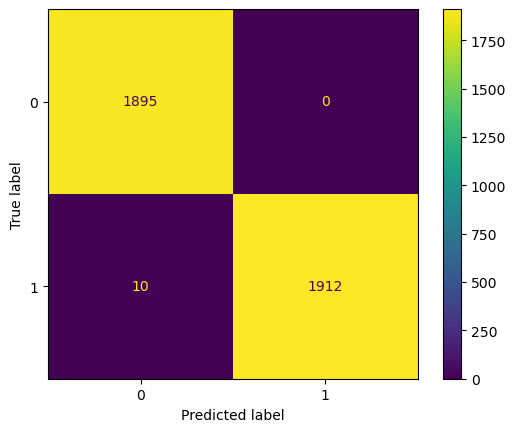

In [60]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
cm = confusion_matrix(y_val, rf_preds, labels=rf_cv.classes_)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_cv.classes_)

# Plot confusion matrix
disp.plot(values_format='')

# Display plot
plt.show()

In [61]:
# Create classification report for random forest model
target_labels = ['opinion', 'claim']
print(classification_report(y_val, rf_preds, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1895
       claim       1.00      0.99      1.00      1922

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



The Classification report shows that the model is near perfect with only 10 misclassifications which are false negatives and 0 false positives.

#### **XGBoost**

In [62]:
#Evaluate XGBoost model
xgb_preds = xgb_cv.best_estimator_.predict(X_val)

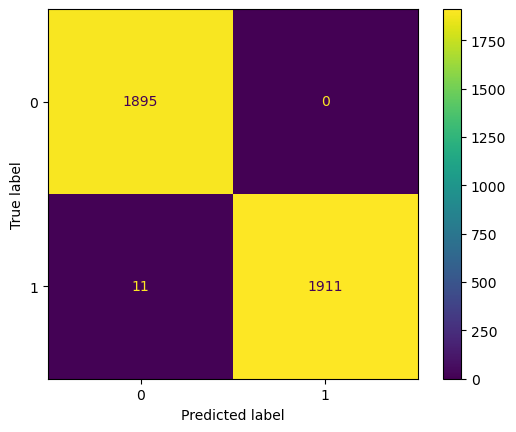

In [63]:
# Compute values for confusion matrix
xgb_cm = confusion_matrix(y_val, xgb_preds)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=None)

# Plot confusion matrix
disp.plot(values_format='')

# Display plot
plt.show()

In [64]:
# Create a classification report
print(classification_report(y_val, xgb_preds, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1895
       claim       1.00      0.99      1.00      1922

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



Random Forest model performed slightly better than the XGBoost model. As we could see there are 11 misclassifications which are false negatives whereas there are only 10 misclassifications in Random Forest Model. Hence, Random Forest it the Champion Model.

### **Use champion model to predict on test data**

In [65]:
# Predict using the test set on the champion model
rf_test_preds = rf_cv.best_estimator_.predict(X_test)

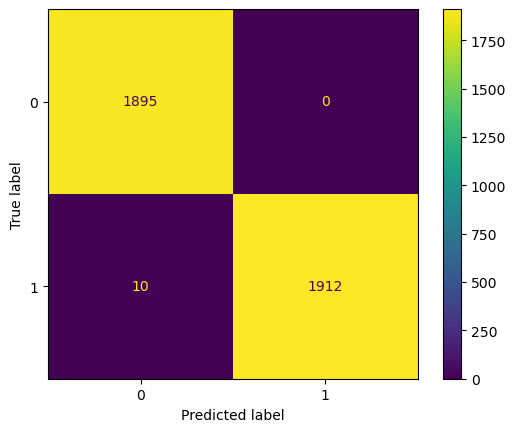

In [66]:
# Compute values for confusion matrix
rf_test_cm = confusion_matrix(y_test, rf_test_preds)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=rf_test_cm, display_labels=None)

# Plot confusion matrix
disp.plot(values_format='')

# Display plot
plt.show()

#### **Feature importances of champion model**


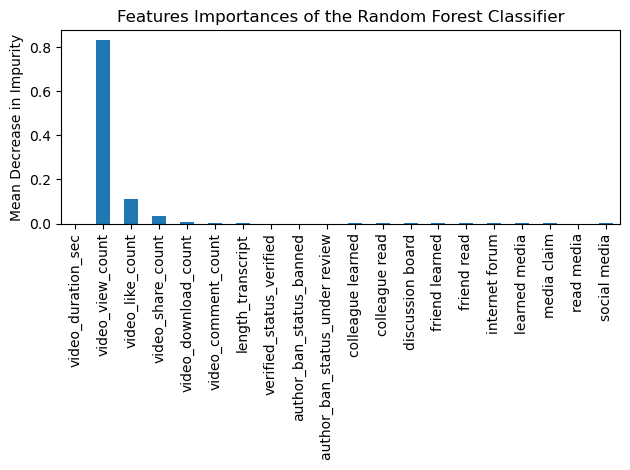

In [67]:
# Plot the feature_importances
importances = rf_cv.best_estimator_.feature_importances_
rf_feature_importances = pd.Series(importances, index=X_test.columns)

fig, ax = plt.subplots()
rf_feature_importances.plot.bar(ax=ax)
plt.title('Features Importances of the Random Forest Classifier')
plt.ylabel('Mean Decrease in Impurity')
fig.tight_layout()

`video_view_count` emerged as the most important feature which is related to the video engagement level by the users which is also estimated from the EDA.

### Conclusion

1. The model performed almost perfectly on both the validation and test sets. The F1, precision and recall scores are ~1 indicating very efficient model.

2. The model classified the claim and opinion based on the video engagement by the users.

3. The model is nearly perfect and doesn't require any further feature engineering.

4. The model doesn't need any new features. But, we don't have anything on the number of reports received per user per video which could be a high deciding factor.